# Show the benefits of circular statistics in Australia

In [1]:
%matplotlib inline

import sys
import warnings
import odc.geo.xr
import numpy as np
import xarray as xr
import branca.colormap as cm
import matplotlib.pyplot as plt
import matplotlib as mpl
from odc.geo.xr import assign_crs

import contextily as ctx
from odc.geo.xr import assign_crs
import matplotlib.colors as colors
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap

## Analysis Parameters


In [2]:
lin_or_circ = 'circular'

p_average_circ = assign_crs(xr.open_dataset(f'/g/data/os22/chad_tmp/Aus_phenology/results/mean_phenology_perpixel_{lin_or_circ}.nc'), crs='EPSG:4326')
p_trends_circ = assign_crs(xr.open_dataset(f'/g/data/os22/chad_tmp/Aus_phenology/results/trends_phenology_perpixel_{lin_or_circ}.nc'), crs='EPSG:4326')

lin_or_circ = 'linear'

p_average_lin = assign_crs(xr.open_dataset(f'/g/data/os22/chad_tmp/Aus_phenology/results/mean_phenology_perpixel_{lin_or_circ}.nc'), crs='EPSG:4326')
p_trends_lin = assign_crs(xr.open_dataset(f'/g/data/os22/chad_tmp/Aus_phenology/results/trends_phenology_perpixel_{lin_or_circ}.nc'), crs='EPSG:4326')



## Masking

In [3]:
season_per_year = p_average_circ['n_seasons']/p_average_circ['n_years']
non_seasonal = xr.where((season_per_year <= 0.90),1,0)
extra_seasonal = xr.where((season_per_year >= 1.1),1,0)
seasonality_mask = (non_seasonal | extra_seasonal)

## Long-term average phenology




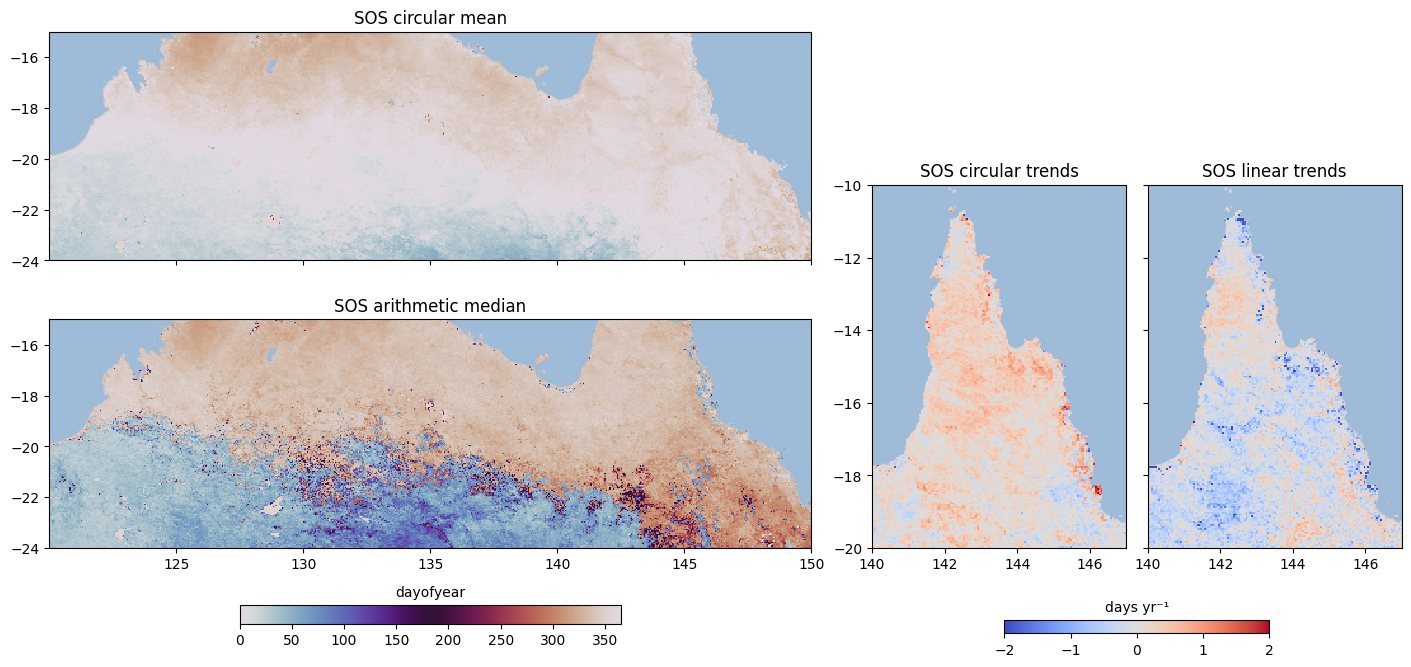

In [4]:
layout = [
    ['A', 'A', 'A', 'B', 'D'],
    ['C','C', 'C', 'B', 'D']
]
# Create the mosaic plot
fig, ax = plt.subplot_mosaic(layout, figsize=(14, 6.5), layout='constrained')

# fig,ax=plt.subplots(2,1, figsize=(11,7), layout='constrained', sharex=True)
cmap='twilight'
vmin,vmax=0,365

p_average_circ['SOS'].sel(latitude=slice(-24,-15), longitude=slice(120,150)).plot(ax=ax['A'],
                       cmap=cmap, vmin=vmin, vmax=vmax, add_labels=False, add_colorbar=False)
ctx.add_basemap(ax['A'], source=ctx.providers.Esri.WorldShadedRelief , crs='EPSG:4326', attribution='', attribution_size=1)
ax['A'].set_xticklabels([])

p_trends_circ['SOS_slope'].sel(latitude=slice(-20,-10), longitude=slice(140,147)).plot(ax=ax['B'],
                                        cmap='coolwarm', vmin=-2, vmax=2, add_labels=False, add_colorbar=False)
ctx.add_basemap(ax['B'], source=ctx.providers.Esri.WorldShadedRelief, crs='EPSG:4326', attribution='', attribution_size=1)


p_average_lin['SOS'].sel(latitude=slice(-24,-15), longitude=slice(120,150)).plot(ax=ax['C'],
                      cmap=cmap, vmin=vmin, vmax=vmax, add_labels=False, add_colorbar=False)
# axes['C'].set_xticklabels([])
ctx.add_basemap(ax['C'], source=ctx.providers.Esri.WorldShadedRelief, crs='EPSG:4326', attribution='', attribution_size=1)

p_trends_lin['SOS_slope'].sel(latitude=slice(-20,-10), longitude=slice(140,147)).plot(ax=ax['D'],
                                        cmap='coolwarm', vmin=-2, vmax=2, add_labels=False, add_colorbar=False)
ax['D'].set_yticklabels([])
ctx.add_basemap(ax['D'], source=ctx.providers.Esri.WorldShadedRelief, crs='EPSG:4326', attribution='', attribution_size=1)

norm = colors.Normalize(vmin=-2, vmax=2)
cbar = plt.cm.ScalarMappable(norm=norm, cmap='coolwarm')
ax_cbar = fig.colorbar(cbar, ax=[ax['B'], ax['D']], shrink=0.5, orientation='horizontal')
ax_cbar.ax.set_title('days yr⁻¹', fontsize=10)

norm = colors.Normalize(vmin=0, vmax=365)
cbar = plt.cm.ScalarMappable(norm=norm, cmap='twilight')
ax_cbar = fig.colorbar(cbar, ax=ax['C'], shrink=0.5, orientation='horizontal')
ax_cbar.ax.set_title('dayofyear', fontsize=10)

ax['A'].set_title('SOS circular mean')
ax['B'].set_title('SOS circular trends')
ax['C'].set_title('SOS arithmetic median');
ax['D'].set_title('SOS linear trends');

fig.savefig(f'/g/data/os22/chad_tmp/Aus_phenology/results/figs/benefits_of_circular_stats.png',
            bbox_inches='tight', dpi=300)

## Area where circular stats is important in Australia

In [5]:
p_sos = p_average_circ['SOS'].where(seasonality_mask!=1)

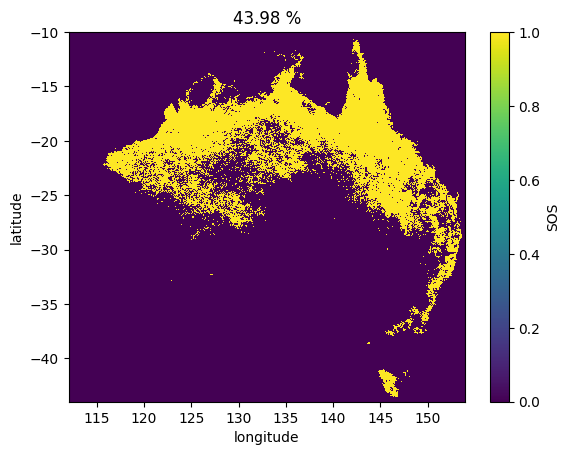

In [12]:
near_calendar_divide = xr.where((p_sos>335) | (p_sos <30), 1, 0)
near_calendar_divide.plot();
plt.title(f'{np.sum(near_calendar_divide) / np.sum(~np.isnan(p_sos)) * 100:.2f} %');

### TOS

In [1]:
# fig,ax = plt.subplots(1,3, figsize=(12,3.5), sharey=True, layout='constrained')

# p_average_circ['TOS'].plot(cmap='twilight',vmin=0, vmax=365, ax=ax[0], add_labels=False)
# p_average_lin['TOS'].plot(cmap='twilight',vmin=0, vmax=365, add_labels=False, ax=ax[1])
# # p_average_circ['TOS_std'].plot(cmap='magma',vmin=0, vmax=70, add_labels=False, ax=ax[2])
# near_calendar_divide = xr.where((p_average_circ['TOS']>335) | (p_average_circ['TOS'] <30), 1, 0)
# near_calendar_divide.plot(ax=ax[2], add_labels=False, add_colorbar=False);

# ax[0].set_title(f'TOS using circular mean (DOY)')
# ax[1].set_title(f'TOS using arithmetic mean (DOY)')
# # ax[2].set_title(f'Circular std. dev in TOS (days)')
# ax[2].set_title(f'Area where circular mean TOS is\nwithin 30 days of DOY365: {np.sum(near_calendar_divide) / np.sum(~np.isnan(p_average_circ.TOS)) * 100:.1f} %', fontsize=10);

# ax[0].axes.get_xaxis().set_ticks([])
# ax[0].axes.get_yaxis().set_ticks([])
# ax[1].axes.get_xaxis().set_ticks([])
# ax[1].axes.get_yaxis().set_ticks([])
# ax[2].axes.get_xaxis().set_ticks([])
# ax[2].axes.get_yaxis().set_ticks([]);
# ax[3].axes.get_xaxis().set_ticks([])
# ax[3].axes.get_yaxis().set_ticks([]);

In [66]:
# xr.where((p_average_circ['SOS_std'] >= 20) & (near_calendar_divide), 1, 0).plot()

## Circular standard deviation

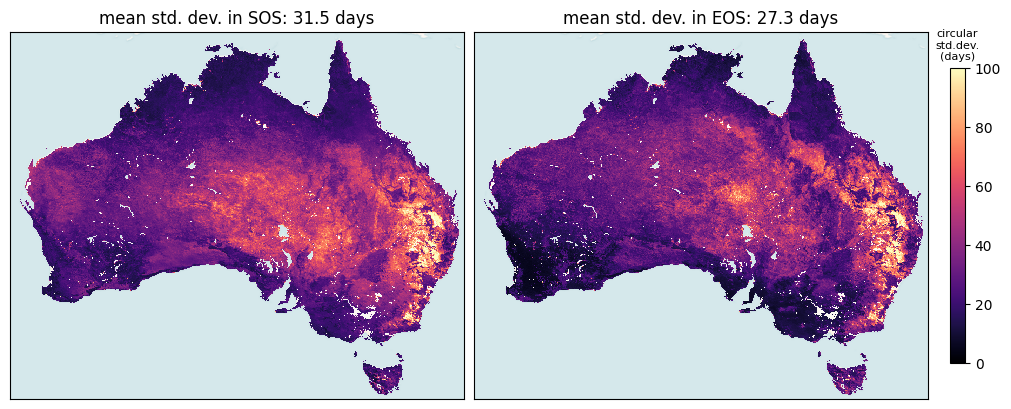

In [13]:
fig,ax = plt.subplots(1,2, figsize=(10,5), sharey=True, layout='constrained')

p_average_circ['SOS_std'].plot(vmin=0, vmax=100, cmap='magma', ax=ax[0], add_colorbar=False, add_labels=False)
ctx.add_basemap(ax[0], source=ctx.providers.CartoDB.VoyagerNoLabels, crs='EPSG:4326', attribution='', attribution_size=1)
ax[0].set_title(f'mean std. dev. in SOS: {p_average_circ["SOS_std"].where(seasonality_mask!=1).mean():.1f} days')
ax[0].axes.get_xaxis().set_ticks([])
ax[0].axes.get_yaxis().set_ticks([])

#.where(seasonality_mask!=1)

p_average_circ['EOS_std'].plot(vmin=0, vmax=100, cmap='magma', ax=ax[1],  add_colorbar=False, add_labels=False)
ctx.add_basemap(ax[1], source=ctx.providers.CartoDB.VoyagerNoLabels, crs='EPSG:4326', attribution='', attribution_size=1)
ax[1].set_title(f'mean std. dev. in EOS: {p_average_circ["EOS_std"].where(seasonality_mask!=1).mean():.1f} days')
ax[1].axes.get_xaxis().set_ticks([])
ax[1].axes.get_yaxis().set_ticks([])

#need to create colorbar manually to have label on top
norm = colors.Normalize(vmin=0, vmax=100)
cbar = plt.cm.ScalarMappable(norm=norm, cmap='magma')
ax_cbar = fig.colorbar(cbar, ax=ax[1], shrink=0.6)
ax_cbar.ax.set_title('circular\nstd.dev.\n(days)', fontsize=8);

## Make a polar and time series plot

In [31]:
from scipy.stats import circmean, circstd
import pandas as pd
import seaborn as sb
import pickle

import sys
sys.path.append('/g/data/os22/chad_tmp/Aus_phenology/src')
from phenology_pixel_circular import remove_circular_outliers_and_unwrap, mk_with_slopes

Dask configuration key 'ucx' has been deprecated; please use 'distributed.comm.ucx' instead
Dask configuration key 'distributed.scheduler.transition-log-length' has been deprecated; please use 'distributed.admin.low-level-log-length' instead
Dask configuration key 'distributed.comm.recent-messages-log-length' has been deprecated; please use 'distributed.admin.low-level-log-length' instead


In [32]:
# phenology calculted earlier
phenometrics_file = '/g/data/os22/chad_tmp/Aus_phenology/data/pickle/IBRA_subregions_AusENDVI-clim_MCD43A4_phenometrics_new.pkl'
with open(phenometrics_file, 'rb') as f:
    eco_regions_phenometrics = pickle.load(f)

In [33]:
k='Warrego Plains'
var='SOS'
df = eco_regions_phenometrics[k]

data = pd.DataFrame({
    "year": df[f'{var}_year'].values,
    "day_of_year": df[var].values
})

# Number of days in a year (adjusting for leap years)
data['days_in_year'] = data['year'].apply(lambda y: 366 if y % 4 == 0 and (y % 100 != 0 or y % 400 == 0) else 365)

# Convert day-of-year to circular coordinates doy / 365 * 2 * np.pi
data['theta'] = data['day_of_year']*((2*np.pi)/data['days_in_year'])

# Remove outliers where 1.5 std devs. 
data['theta_unwrap'] = remove_circular_outliers_and_unwrap(data['theta'], n_sigma=2)

# Calculate circular mean
circular_mean = circmean(data['theta'], nan_policy='omit')
circular_std = circstd(data['theta'], nan_policy='omit')

circular_mean_doy = circular_mean / (2 * np.pi) * 365
circular_std_doy = circular_std / (2 * np.pi) * 365

In [34]:
def plot_circular_histogram(theta, circular_mean_doy, arithmetic_mean_doy, arithmetic_median_doy, bins=20):
    """
    Create polar histogram plot of the DOY data with circular and arithmetic means.
    """
    
    # Create figure
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(6,6))
    # Customize plot
    ax.set_theta_zero_location('N')  # 0 at top
    ax.set_theta_direction(-1)  # Clockwise
    
    # Create histogram
    counts, edges = np.histogram(theta, bins=bins, range=(0, 2*np.pi))
    width = (edges[1] - edges[0])
    bars = ax.bar(edges[:-1], counts, width=width, alpha=0.5, color='lightblue', 
                 label='DOY')
    
    # Plot means with thinner wedges
    mean_width = width * 0.3  # Make mean indicators 30% of histogram bar width
    
    # Plot circular mean
    max_count = max(counts)
    circular_mean_theta  = (circular_mean_doy / 366.0) * 2 * np.pi
    ax.bar(circular_mean_theta, max_count, width=mean_width, color='orange', alpha=0.8,
          label='Circular Mean')
    
    # Plot arithmetic mean
    arith_mean_theta = (arithmetic_median_doy / 366.0) * 2 * np.pi
    ax.bar(arith_mean_theta, max_count, width=mean_width, color='red', alpha=0.8,
          label='Arithmetic Median')

    arith_mean_theta = (arithmetic_mean_doy / 366.0) * 2 * np.pi
    ax.bar(arith_mean_theta, max_count, width=mean_width, color='blue', alpha=0.8,
          label='Arithmetic Mean')

    # Set DOY labels
    ax.set_xticks(list(ax.get_xticks()))
    labels = ['0', '45', '90', '135', '180', '225', '270', '315']
    ax.set_xticklabels(labels,  fontsize=13)
    
    # Add gridlines
    ax.grid(True, alpha=0.3)
    # Add legend
    ax.legend(ncols=4, bbox_to_anchor=(1.1, 0.000), fontsize=9)  #
    ax.set_title(f'{k} {var} DOY distribution')
    
    return fig

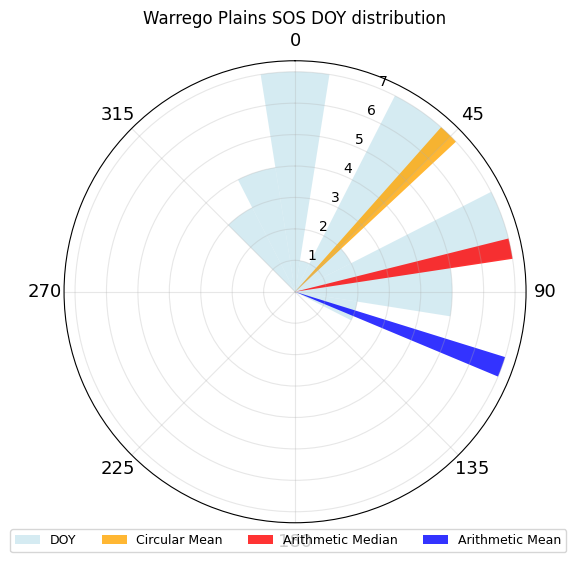

In [35]:
# Create visualization
fig = plot_circular_histogram(theta=data['theta'],
                              circular_mean_doy = circular_mean_doy,
                              arithmetic_mean_doy = df[var].mean(),
                              arithmetic_median_doy = df[var].median()
                             );
fig.savefig(f'/g/data/os22/chad_tmp/Aus_phenology/results/figs/circular_distribution_{k}_{var}.png',
            bbox_inches='tight', dpi=300)

### Nice time-series plot for publication

In [36]:
data['theta_unwrap_DOY_anomaly'] = data['theta_unwrap'] * 365 / (2 * np.pi) - circular_mean_doy

p_value, slope, intercept = mk_with_slopes(data['theta_unwrap_DOY_anomaly'])

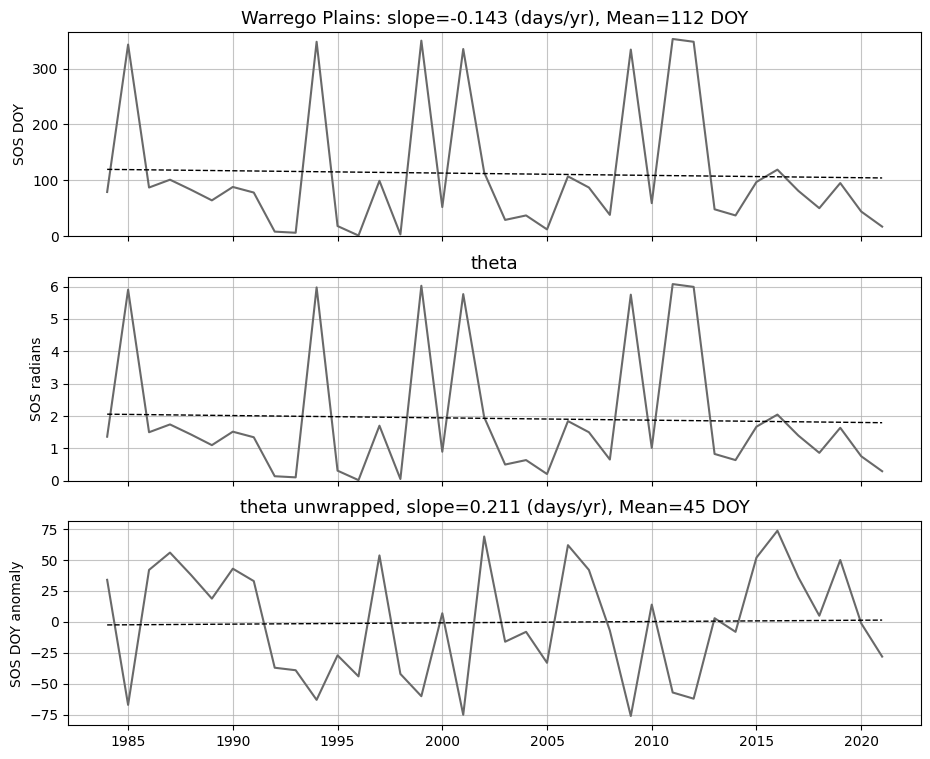

In [37]:
fig,ax=plt.subplots(3,1, figsize=(11,9), sharex=True)

x = list(range(1984,2022))

ax[0].plot(x, df[var], color='dimgrey')
sb.regplot(x=x, y=var, data=df, ci=False, scatter=False, ax=ax[0], line_kws={"linestyle":'--', 'linewidth':1, 'color':'black'})

# data['theta'].plot(ax=ax[1],label='theta', color='slategrey')
ax[1].plot(x, data['theta'], color='dimgrey')
sb.regplot(x=x, y='theta', data=data, ci=False, scatter=False, ax=ax[1], line_kws={"linestyle":'--', 'linewidth':1, 'color':'black'})

ax[2].plot(x, data['theta_unwrap_DOY_anomaly'], label=f'x, slope={slope:.4f}', color='dimgrey')
sb.regplot(x=x, y='theta_unwrap_DOY_anomaly', data=data, ci=False, scatter=False, ax=ax[2], line_kws={"linestyle":'--', 'linewidth':1, 'color':'black'})

ax[0].set_ylim(0,365)
ax[1].set_ylim(0,6.3)
# ax[2].set_ylim(-0.75, 2.5)

ax[0].grid(alpha=0.75)
ax[1].grid(alpha=0.75)
ax[2].grid(alpha=0.75)

ax[0].set_ylabel(var+' DOY')
ax[1].set_ylabel('SOS radians')
ax[2].set_ylabel('SOS DOY anomaly')

ax[0].set_title(f'{k}: slope={mk_with_slopes(df[var]).slope:.3f} (days/yr), Mean={df[var].mean():.0f} DOY', fontsize=13)
ax[1].set_title('theta',  fontsize=13)
ax[2].set_title(f'theta unwrapped, slope={slope:.3f} (days/yr), Mean={circular_mean_doy:.0f} DOY',  fontsize=13);

fig.savefig(f'/g/data/os22/chad_tmp/Aus_phenology/results/figs/time_series_transformed_{k}_{var}.png',
            bbox_inches='tight', dpi=300)